<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/Easy_Network_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Fully connected network with Keras

Author: Umberto Michelucci (umberto.michelucci@toelt.ai)

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Text(0.5, 1.0, 'Label is 9')

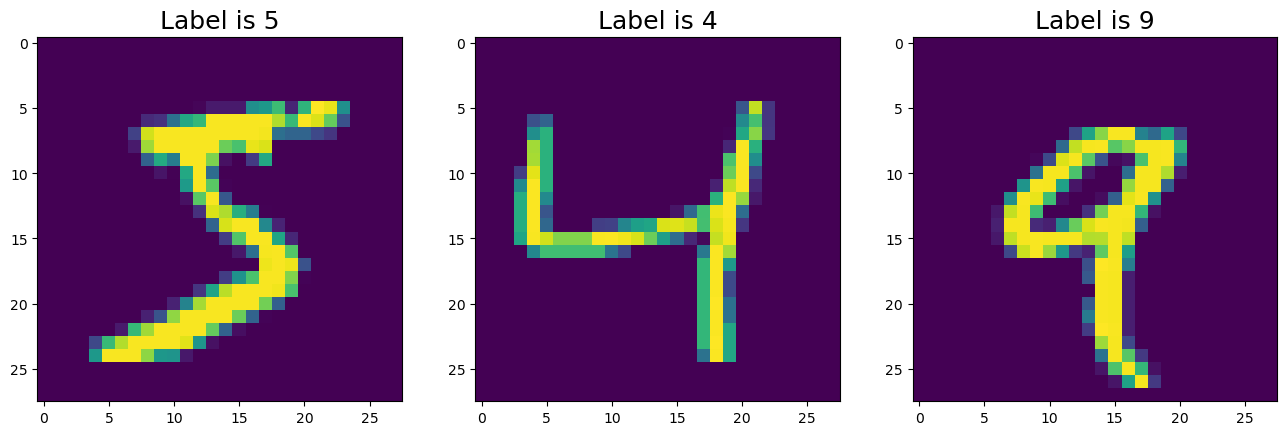

In [3]:
fig = plt.figure(figsize = (16,5))
fig.add_subplot(1,3,1)
plt.imshow(x_train[0])
plt.title("Label is "+ str(y_train[0]), fontsize = 18)
fig.add_subplot(1,3,2)
plt.imshow(x_train[2])
plt.title("Label is "+ str(y_train[2]), fontsize = 18)
fig.add_subplot(1,3,3)
plt.imshow(x_train[4])
plt.title("Label is "+ str(y_train[4]), fontsize = 18)

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 1s 595us/step - loss: 0.2890 - accuracy: 0.9171
Epoch 2/5
1875/1875 [==============================] - 1s 602us/step - loss: 0.1398 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 1s 602us/step - loss: 0.1030 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 1s 598us/step - loss: 0.0842 - accuracy: 0.9743
Epoch 5/5
1875/1875 [==============================] - 1s 596us/step - loss: 0.0718 - accuracy: 0.9779
313/313 - 0s - loss: 0.0730 - accuracy: 0.9774 - 141ms/epoch - 449us/step


[0.07295423746109009, 0.977400004863739]

In [6]:
model.predict(x_train[0][np.newaxis,:])[0]

1/1 [==============================] - 0s 34ms/step


array([1.4019212e-14, 1.4581031e-11, 3.3458413e-11, 2.4744656e-03,
       2.1763794e-22, 9.9752551e-01, 1.5581849e-15, 1.8614313e-11,
       6.9925305e-13, 3.4248931e-10], dtype=float32)

1/1 [==============================] - 0s 7ms/step


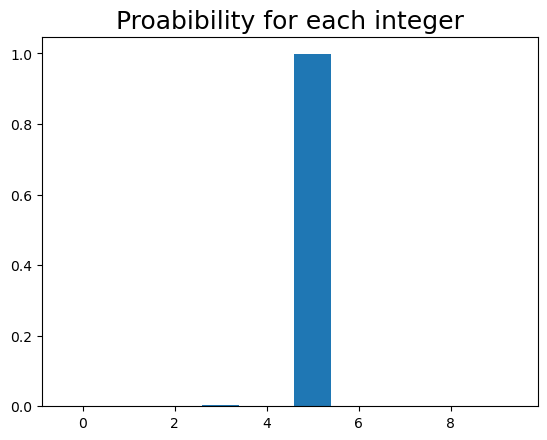

In [7]:
plt.bar(np.arange(0,10,1), model.predict(x_train[0][np.newaxis,:])[0])
plt.title ("Proabibility for each integer", fontsize = 18)
plt.show()